#**Begin Transfomer Models**

Installing Transformers

In [1]:
!pip install transformers
import transformers

Installing lite version of transformers

In [2]:
!pip install transformers[sentencepiece]

sentiment analysis pipeline

In [4]:
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier("HI MY NAME IS YESHVANTH ")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9944663643836975}]

In [6]:
classifier(
    ["My first name is yeshvanth", "My last name is Kurapati"]
)

[{'label': 'POSITIVE', 'score': 0.9753336906433105},
 {'label': 'POSITIVE', 'score': 0.9766095280647278}]

Zero shot classification

In [7]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification")
classifier("Mahesh babu is a good actor", candidate_labels = ["movies","politics","sports"])

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'Mahesh babu is a good actor',
 'labels': ['movies', 'sports', 'politics'],
 'scores': [0.9444267153739929, 0.02877006120979786, 0.02680332027375698]}

Text generation

In [9]:
from transformers import pipeline
generator = pipeline("text-generation")
generator("How to play cover drive in cricket")

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'How to play cover drive in cricket\n\nWhy do you get more cricket, and more of the match you are playing?\n\nWe are an international community of professional cricketers. The aim of the tournament will be to get cricket in England'}]

Use any model from the Hub in a pipeline

In [10]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "How to play cover drive in cricket",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'How to play cover drive in cricket.›I hope you share with me that you are going to enjoy the game!›Please feel free'},
 {'generated_text': 'How to play cover drive in cricket.\n\n\n\n\n\nIf you liked this game, or a video or tip it by email, please'}]

Mask filling: The top k argument controls how many possibilities you want to be displayed. Note that here the models fills in the special <mask> word, which is often reffered to as a mask token

In [13]:
from transformers import pipeline
unmasker = pipeline("fill-mask")
unmasker("<mask> is the first president of united states of america", top_k = 3)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.38805586099624634,
  'token': 33382,
  'token_str': 'Obama',
  'sequence': 'Obama is the first president of united states of america'},
 {'score': 0.11625067889690399,
  'token': 7565,
  'token_str': 'Trump',
  'sequence': 'Trump is the first president of united states of america'},
 {'score': 0.08904972672462463,
  'token': 43294,
  'token_str': 'Bush',
  'sequence': 'Bush is the first president of united states of america'}]

Named entity recognition

In [17]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities = True)
ner("My name is Yeshvanth and I study at San Jose State University in California")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.10/dist-p

[{'entity_group': 'PER',
  'score': 0.9915317,
  'word': 'Yeshvanth',
  'start': 11,
  'end': 20},
 {'entity_group': 'ORG',
  'score': 0.99477005,
  'word': 'San Jose State University',
  'start': 36,
  'end': 61},
 {'entity_group': 'LOC',
  'score': 0.9984871,
  'word': 'California',
  'start': 65,
  'end': 75}]

Question answering

In [18]:
question_ans = pipeline("question-answering")
question_ans( question = "Where do I study?", context = "My name is Yeshvanth and I study at San Jose State University in california")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

{'score': 0.9068200588226318,
 'start': 36,
 'end': 61,
 'answer': 'San Jose State University'}

Summarization

In [20]:
summarizer = pipeline("summarization")
summarizer("""Ghattamaneni Mahesh Babu (born 9 August 1975) is an Indian actor, producer, media personality, and philanthropist who works mainly in Telugu cinema. He has appeared in more than 25 films, and won several accolades including, Nine Nandi Awards, five Filmfare Telugu Awards, four SIIMA Awards, three CineMAA Awards, and one IIFA Utsavam Award. One of the highest-paid Telugu film actors,[1] he also owns the production house G. Mahesh Babu Entertainment.

The younger son of veteran Telugu actor Krishna, Mahesh made his debut as a child artist in a cameo role in Needa (1979), at the age of four,[2] and acted in eight other films as a child artist. He made his debut as a lead actor with Rajakumarudu (1999) which won him the Nandi Award for Best Male Debut.[3] Babu achieved his breakthrough with the supernatural drama Murari (2001), and the action film Okkadu (2003). He went on to act in other commercially successful films such as Arjun (2004), Athadu (2005), Pokiri (2006), Dookudu (2011), Businessman (2012), Seethamma Vakitlo Sirimalle Chettu (2013), Srimanthudu (2015), Bharat Ane Nenu (2018), Maharshi (2019), Sarileru Neekevvaru (2020) and Sarkaru Vaari Paata (2022). Pokiri held the record of being the highest-grossing Telugu film, Maharshi won the National Film Award for Best Popular Film, while Sarileru Neekevvaru, his highest grosser, collected over ₹260 crore at the box office.[4][5]

Referred to in the media and by his fans as "Prince", he is one of the most popular actors of Telugu cinema.[6][7] In addition to being an actor, he is a humanitarian and philanthropist – co running the charitable trust and non-profit organisation Heal A Child.[8] He is also associated with Rainbow Hospitals as their goodwill ambassador.[9] He entered into the film exhibition business alongside the late Narayandas Narang of Asian Group with the inauguration of the seven-screen multiplex, AMB cinemas at Gachibowli, Hyderabad.[10] He married actress Namrata Shirodkar in 2005, with whom he has a son and a daughter.[11]""")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': ' Ghattamaneni Mahesh Babu is an Indian actor, producer, media personality, and philanthropist . He has appeared in more than 25 films, and won several accolades including, Nine Nandi Awards, five Filmfare Telugu Awards, four SIIMA Awards, three CineMAA Awards, and one IIFA Utsavam Award . Babu achieved his breakthrough with the supernatural drama Murari (2001), and the action film Okkadu (2003)'}]

Translation

In [23]:
translator = pipeline("translation", model = "Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'This course is produced by Hugging Face.'}]

Bias and limitations

In [29]:
from transformers import pipeline
unmasker = pipeline("fill-mask", model ="bert-base-uncased")
result = unmasker("This man works as a [MASK]")
print ([r["token_str"]for r in result])

result = unmasker("This woman works as a [MASK]")
print ([r["token_str"]for r in result])

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


['.', ';', '|', '!', '?']
['.', ';', '|', '!', '?']


Installing transformers
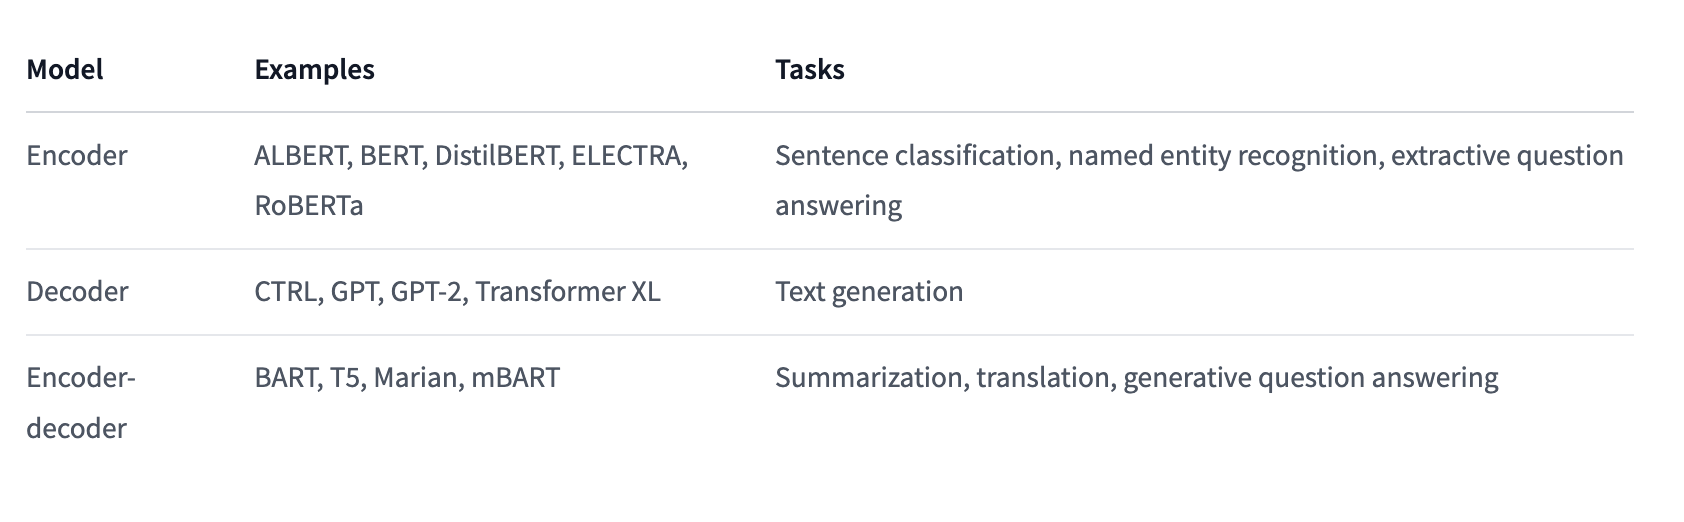

#**Using Transformers**

**Behind the pipeline : For Sentiment Analysis**

In [46]:
print("Step 1: Tokenization")
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

print("Step 2: AutoModel class: high-dimensional vector representing the contextual understanding of that input by the Transformer model")

from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)
print(" A high deimensional vector")
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

print("Step 3: AutoModelForSequenceClassification class: the model head takes as input the high-dimensional vectors we saw before, and outputs vectors containing two values (one per label)")
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)



print(outputs.logits.shape)
print("Step 4: PostProcessing the output")

print(outputs.logits)


print("Step 5: Adding Softmax layer")
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

Step 1: Tokenization
{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}
Step 2: AutoModel class: high-dimensional vector representing the contextual understanding of that input by the Transformer model
 A high deimensional vector
torch.Size([2, 16, 768])
Step 3: AutoModelForSequenceClassification class: the model head takes as input the high-dimensional vectors we saw before, and outputs vectors containing two values (one per label)
torch.Size([2, 2])
Step 4: PostProcessing the output
tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)
Step 5: Adding Softmax layer
tensor([[4.0195e-02, 9.5980e-01],
 

**Instantiate A transformer Model**

In [48]:
from transformers import AutoModel

bert_model = AutoModel.from_pretrained("bert-base-cased")
gpt_model = AutoModel.from_pretrained("gpt2")
bart_model = AutoModel.from_pretrained("facebook/bart-base")

print(type(bert_model))
print(type(gpt_model))
print(type(bart_model))

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

<class 'transformers.models.bert.modeling_bert.BertModel'>
<class 'transformers.models.gpt2.modeling_gpt2.GPT2Model'>
<class 'transformers.models.bart.modeling_bart.BartModel'>


In [49]:
from transformers import AutoConfig

bert_config = AutoConfig.from_pretrained("bert-base-cased")
gpt_config = AutoConfig.from_pretrained("gpt2")
bart_config = AutoConfig.from_pretrained("facebook/bart-base")

print(type(bert_config))
print(type(gpt_config))
print(type(bart_config))

<class 'transformers.models.bert.configuration_bert.BertConfig'>
<class 'transformers.models.gpt2.configuration_gpt2.GPT2Config'>
<class 'transformers.models.bart.configuration_bart.BartConfig'>


Inside config

In [50]:
from transformers import BertConfig

bert_config = BertConfig.from_pretrained("bert-base-cased")
print(bert_config)

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



Using only 10 layers instead of 12

Saving the model

Reloading a saved model

In [55]:
from transformers import BertConfig, BertModel

bert_config = BertConfig.from_pretrained("bert-base-cased", num_hidden_layers = 10)
bert_model = BertModel(bert_config)

print(bert_config)


bert_model.save_pretrained("YESH-BERT")

bert_model = BertModel.from_pretrained("YESH-BERT")

bert_config = AutoConfig.from_pretrained("YESH-BERT")
print(bert_config)

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 10,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.38.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}

BertConfig {
  "_name_or_path": "YESH-BERT",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "mod

#**Tokenizers**

Split words in a sentence using python

In [57]:
tokenized_text = "Hi My Name is Allu Arjun, an academy award winner".split()
print(tokenized_text)

['Hi', 'My', 'Name', 'is', 'Allu', 'Arjun,', 'an', 'academy', 'award', 'winner']


In [58]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


Form token to input IDs

In [59]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


Decoding

In [60]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


#**Handling multiple sequences**

In [66]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


Padding

In [67]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


Attention masks


In [68]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


###Wrap up:

- Padding (longest, max_length, max_length(max_length = 8)**bold text**
- Truncate (pt, tf, np)
- Special tokens


In [70]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)

##Conclusion:
What we have learnt:

- Learned the basic building blocks of a Transformer model.
- Learned what makes up a tokenization pipeline.
-Saw how to use a Transformer model in practice.
-Learned how to leverage a tokenizer to convert text to tensors that are understandable by the model.
-Set up a tokenizer and a model together to get from text to predictions.
-Learned the limitations of input IDs, and learned about attention masks.
-Played around with versatile and configurable tokenizer methods.